In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv("data/stud.csv")

In [60]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [61]:
df.shape

(1000, 8)

In [62]:
# checking missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [63]:
# checking duplicate values
df.duplicated().sum()

np.int64(0)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [65]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [66]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [67]:
# exploring every categorical features
print(f"unique categories in the 'gender' feature: {df["gender"].unique()}")
print(
    f"unique categories in the 'race_ethnicity' feature: {df["race_ethnicity"].unique()}"
)
print(
    f"unique categories in the 'parental_level_of_education' feature: {df["parental_level_of_education"].unique()}"
)
print(f"unique categories in the 'lunch' feature: {df["lunch"].unique()}")
print(
    f"unique categories in the 'test_preparation_course' feature: {df["test_preparation_course"].unique()}"
)

unique categories in the 'gender' feature: ['female' 'male']
unique categories in the 'race_ethnicity' feature: ['group B' 'group C' 'group A' 'group D' 'group E']
unique categories in the 'parental_level_of_education' feature: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique categories in the 'lunch' feature: ['standard' 'free/reduced']
unique categories in the 'test_preparation_course' feature: ['none' 'completed']


In [68]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print(f"total number of numerical features are {len(numerical_features)} -> {numerical_features}")
print(f"total number of categorical features are {len(categorical_features)} -> {categorical_features}")

total number of numerical features are 3 -> ['math_score', 'reading_score', 'writing_score']
total number of categorical features are 5 -> ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [69]:
# adding new features

df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"] / 3

In [70]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [71]:
math_full = df[df['math_score'] == 100]['average_score'].count()
reading_full = df[df["reading_score"] == 100]['average_score'].count()
writing_full = df[df["writing_score"] == 100]['average_score'].count()

In [72]:
print(f"students with full score in math: {math_full}")
print(f"students with full score in reading: {reading_full}")
print(f"students with full score in writing: {writing_full}")

students with full score in math: 7
students with full score in reading: 17
students with full score in writing: 14


In [73]:
math_less_20 = df[df["math_score"] <= 20]["average_score"].count()
reading_less_20 = df[df["reading_score"] <= 20]["average_score"].count()
writing_less_20 = df[df["writing_score"] <= 20]["average_score"].count()

In [74]:
print(f"students who scored less than equal to 20 in math: {math_less_20}")
print(f"students who scored less than equal to 20 in reading: {reading_less_20}")
print(f"students who scored less than equal to 20 in writing: {writing_less_20}")

students who scored less than equal to 20 in math: 4
students who scored less than equal to 20 in reading: 1
students who scored less than equal to 20 in writing: 3


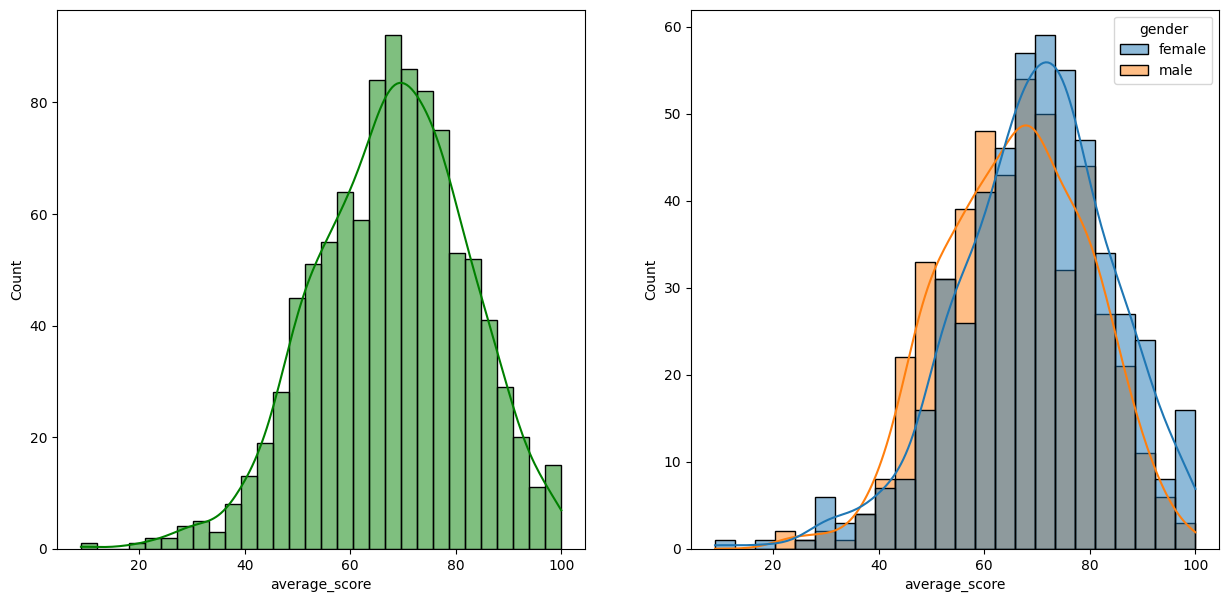

In [82]:
# visualization

fig, axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average_score',hue='gender',kde=True)
plt.show()